In [1]:
import sys
import numpy as np
sys.path.insert(1, '/usr/share/gwyddion/pygwy/')
sys.path.insert(1,"/usr/local/lib64/python2.7/site-packages")
import gwy
#import gwyutils
#import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
import copy
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

In [28]:
#data_path ='/home/jorghyq/Project/Gwyddion-Utils/test/A151117.155350-00742.sxm'
data_path = '/home/jorghyq/Project/Gwyddion-Utils/test/20160425-112013_STM--312_1.Z_mtrx'
c = gwy.gwy_file_load(data_path,gwy.RUN_NONINTERACTIVE)
#dfields = gwyutils.get_data_fields_dir(c)
#keys = c.keys_by_name()
#print keys
#data = c['/0/data']

#channel = c['/0/data/title']
#print channel

In [29]:
keys = c.keys_by_name()
print keys
meta = c['/0/meta']
#print meta.keys_by_name()
#print meta.get_si_unit_xy().get_string(0)

('/0/meta/I.Oversampling_Factor', '/0/meta/I.Initial_Delay', '/0/meta/XYScanner.Angle', '/0/meta/I_Reg.Enable', '/0/meta/XYScanner.X_Offset', '/0/meta/I_Reg.Enable_Storing', '/0/meta/XYScanner.Y_Offset', '/0/meta/I_Reg.Auto_Oversampling', '/0/meta/I_Reg.Oversampling_Factor', '/0/meta/XYScanner.Move_Raster_Time', '/0/meta/I_Reg.Initial_Delay', '/0/meta/XYScanner.Subgrid_X', '/0/meta/RSGBService.Self_Test_Type', '/0/meta/XYScanner.Subgrid_Y', '/0/meta/Regulator.Run_Frequency', '/0/meta/XYScanner.Enable_Subgrid', '/0/meta/Regulator.Feedback_Loop_Enabled', '/0/meta/XYScanner.Subgrid_Match_Mode', '/0/meta/Regulator.Z_Offset', '/0/meta/XYScanner.X_Retrace', '/0/meta/Regulator.Alternate_Line_Weighting', '/0/meta/XYScanner.Y_Retrace', '/0/meta/Regulator.Enable_Alternate_Line_Weighting', '/0/meta/XYScanner.Exact_Match', '/0/meta/Regulator.ADC_Read_Mode_1', '/0/meta/XYScanner.Line_Start_Delay', '/0/meta/Regulator.Feedback_Loop_Characteristic_1', '/0/meta/XYScanner.Line_End_Delay', '/0/meta/Regul

In [31]:
bias = c['/meta/eepa/GapVoltageControl.Voltage']
print bias
current = c['/meta/eepa/Regulator.Setpoint_1']
print current
test= c['/2/data']
print test

0.1
5e-09
<gwy.DataField object at 0x34836e0 (GwyDataField at 0x35a5340)>


In [8]:
f = c['/0/data']
temp = f.get_data()
temp = np.array(temp)
temp2 = temp.reshape((512,512))
temp3 = temp2 * 1e9
temp3 = temp3
temp2.shape

(512, 512)

In [3]:
julio = np.loadtxt('/home/jorghyq/Project/Gwyddion-Utils/Julio.txt',delimiter=',')

In [12]:
julio2 = julio/255
print julio2

[[ 0.          0.          1.        ]
 [ 0.33333333  0.33333333  1.        ]
 [ 0.62745098  0.62745098  0.70196078]
 [ 0.8627451   0.8627451   0.16470588]
 [ 1.          1.          0.01568627]
 [ 0.          1.          0.        ]
 [ 0.06666667  1.          0.06666667]
 [ 0.18431373  0.91764706  0.18431373]
 [ 0.41568627  0.62352941  0.41568627]
 [ 0.71372549  0.18431373  0.71372549]
 [ 0.90980392  0.02745098  0.90980392]
 [ 1.          0.02352941  1.        ]
 [ 1.          0.          0.        ]
 [ 0.53333333  0.1254902   0.1254902 ]
 [ 0.22352941  0.36862745  0.36862745]
 [ 0.06666667  0.59607843  0.59607843]
 [ 0.02352941  0.7372549   0.7372549 ]
 [ 0.02352941  1.          1.        ]]


In [31]:
julio_data = {
    'blue': [
    (0.0,   0.0,    1), 
    (0.333, 0.333,    1), 
    (0.627,  0.627,    0.701), 
    (0.863, 0.863,    0.164), 
    (1,   1,    0.016), 
    ],

    'green': [
    (0.0,   1,                    0),
    (0.067, 1,    0.067),
    (0.184,  0.917,    0.184),
    (0.415, 0.623,    0.415), 
    (0.713,   0.184,                    0.713), 
    (0.909, 0.027,    0.909),
    (1,  0.023,  1),
    ],

    'red': [
    (1,   0.0,                    0),
    (0.533, 0.125,    0.125),
    (0.223,  0.369,     0.369),
    (0.067, 0.596,    0.596), 
    (0.023,   0.737,                    0.737), 
    (0.023, 1,    1)]
    }

In [34]:
high = 255
low = 0
amin = temp2.min()
amax = temp2.max()
rng = amax - amin
test = high - (((high - low) * (amax - temp2)) / rng)
print test.astype('uint8')

[[162 162 162 ..., 162 162 162]
 [162 162 162 ..., 162 162 162]
 [162 162 162 ..., 162 162 162]
 ..., 
 [253 253 253 ..., 134 133 133]
 [254 253 253 ..., 134 133 133]
 [255 254 254 ..., 134 134 134]]


In [36]:
fire = np.loadtxt('/home/jorghyq/Project/Gwyddion-Utils/pygwy/fire.txt',delimiter=' ')

In [23]:
fire = np.flipud(fire)

In [39]:
np.savetxt('/home/jorghyq/Project/GwyUtils/fire.txt',fire,delimiter=' ',fmt = '%d')

In [47]:
julio_gwy = np.loadtxt('/home/jorghyq/.gwyddion/gradients/julio',delimiter=' ',skiprows=1)

In [49]:
julio_gwy2 = julio_gwy[:,1:4]

In [61]:
np.savetxt('/home/jorghyq/Project/Gwyddion-Utils/julio_gwy.txt',julio_gwy2,delimiter=' ',fmt='%d')

In [81]:
cm = mlp.colors.ListedColormap(julio_gwy2)

In [79]:
cm = mlp.colors.ListedColormap(fire/255)

In [70]:
low = 20
high = 150
test2 = copy.deepcopy(test)
test2[np.where(test2<low)] = low
test2[np.where(test2>high)]= high

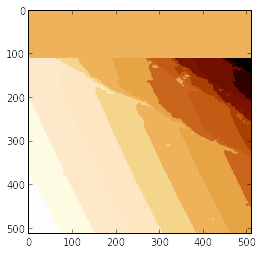

In [82]:
plt.imshow(test,cmap=cm)

In [30]:
new = test.astype('uint8')
img = Image.fromarray(new)

In [61]:
plt.imsave('test.png',test,cmap=cm)

In [33]:
img.save('test.png',cmap=cm)

In [44]:
new = np.zeros((512+40,512))
new[:,:] = 255
new[:512,:512] = test
new = new.astype('uint8')

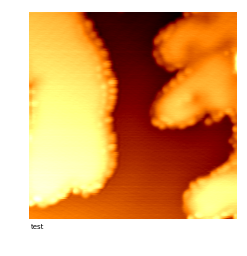

In [66]:
plt.imshow(new,cmap = cm)
plt.text(5,512+25,'test',fontsize=7)
plt.axis('off')
plt.savefig('test.png',cmap='gray')

In [64]:
plt.imsave('test.png',new,cmap=cm)